In [1]:
import pandas as pd
df = pd.read_csv("data/telco.csv")
df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [2]:
#shape
df.shape

(7043, 21)

In [3]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [4]:
df.duplicated().sum()

0

In [5]:
#as there is no duplicates so we dont need to drop them

In [6]:
# Convert TotalCharges to numeric
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [7]:
# Count how many became NaN after conversion
missing_tc = df['TotalCharges'].isna().sum()
print("Number of rows where TotalCharges is NaN:", missing_tc)

Number of rows where TotalCharges is NaN: 11


In [8]:
# Show those problematic rows
df[df['TotalCharges'].isna()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [9]:
df = df.dropna(subset=['TotalCharges']).reset_index(drop=True)
print("Shape after dropping TotalCharges NaN rows:", df.shape)


Shape after dropping TotalCharges NaN rows: (7032, 21)


In [10]:
df['SeniorCitizen'] = df['SeniorCitizen'].map({0: 'No', 1: 'Yes'})


In [11]:
yes_no_cols = [col for col in df.columns if df[col].dtype == 'object' 
               and df[col].isin(['Yes','No']).any()]

yes_no_cols


['SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'PaperlessBilling',
 'Churn']

In [12]:
for col in yes_no_cols:
    df[col] = df[col].str.strip().str.lower()


In [13]:
df = df.drop('customerID', axis=1)
df.head()


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,no,yes,no,1,no,no phone service,dsl,no,yes,no,no,no,no,Month-to-month,yes,Electronic check,29.85,29.85,no
1,Male,no,no,no,34,yes,no,dsl,yes,no,yes,no,no,no,One year,no,Mailed check,56.95,1889.50,no
2,Male,no,no,no,2,yes,no,dsl,yes,yes,no,no,no,no,Month-to-month,yes,Mailed check,53.85,108.15,yes
3,Male,no,no,no,45,no,no phone service,dsl,yes,no,yes,yes,no,no,One year,no,Bank transfer (automatic),42.30,1840.75,no
4,Female,no,no,no,2,yes,no,fiber optic,no,no,no,no,no,no,Month-to-month,yes,Electronic check,70.70,151.65,yes


In [14]:
df.shape

(7032, 20)

In [15]:
# Select numeric and categorical columns
numeric_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()

print("=== Numeric Summary ===")
display(df[numeric_cols].describe())

=== Numeric Summary ===


,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2283.300441
std,24.545260,30.085974,2266.771362
min,1.000000,18.250000,18.800000
25%,9.000000,35.587500,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.862500,3794.737500
max,72.000000,118.750000,8684.800000


In [16]:
print("\n=== Categorical Value Counts (Top Categories) ===")
for col in categorical_cols:
    print(f"\nColumn: {col}")
    display(df[col].value_counts().head())  # top categories


=== Categorical Value Counts (Top Categories) ===

Column: gender


gender
Male      3549
Female    3483
Name: count, dtype: int64


Column: SeniorCitizen


SeniorCitizen
no     5890
yes    1142
Name: count, dtype: int64


Column: Partner


Partner
no     3639
yes    3393
Name: count, dtype: int64


Column: Dependents


Dependents
no     4933
yes    2099
Name: count, dtype: int64


Column: PhoneService


PhoneService
yes    6352
no      680
Name: count, dtype: int64


Column: MultipleLines


MultipleLines
no                  3385
yes                 2967
no phone service     680
Name: count, dtype: int64


Column: InternetService


InternetService
fiber optic    3096
dsl            2416
no             1520
Name: count, dtype: int64


Column: OnlineSecurity


OnlineSecurity
no                     3497
yes                    2015
no internet service    1520
Name: count, dtype: int64


Column: OnlineBackup


OnlineBackup
no                     3087
yes                    2425
no internet service    1520
Name: count, dtype: int64


Column: DeviceProtection


DeviceProtection
no                     3094
yes                    2418
no internet service    1520
Name: count, dtype: int64


Column: TechSupport


TechSupport
no                     3472
yes                    2040
no internet service    1520
Name: count, dtype: int64


Column: StreamingTV


StreamingTV
no                     2809
yes                    2703
no internet service    1520
Name: count, dtype: int64


Column: StreamingMovies


StreamingMovies
no                     2781
yes                    2731
no internet service    1520
Name: count, dtype: int64


Column: Contract


Contract
Month-to-month    3875
Two year          1685
One year          1472
Name: count, dtype: int64


Column: PaperlessBilling


PaperlessBilling
yes    4168
no     2864
Name: count, dtype: int64


Column: PaymentMethod


PaymentMethod
Electronic check             2365
Mailed check                 1604
Bank transfer (automatic)    1542
Credit card (automatic)      1521
Name: count, dtype: int64


Column: Churn


Churn
no     5163
yes    1869
Name: count, dtype: int64

In [17]:
#HUM THODA SA OBSERVE KRENGE
df[numeric_cols].skew()


tenure            0.237731
MonthlyCharges   -0.222103
TotalCharges      0.961642
dtype: float64

In [18]:
impossible = df[(df['tenure'] == 0) & (df['TotalCharges'] > 0)]
impossible


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


In [19]:
outliers_mc = df[df['MonthlyCharges'] > 120]
outliers_mc


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


In [20]:
for col in categorical_cols:
    print(f"\nColumn: {col}")
    print(df[col].value_counts())



Column: gender
gender
Male      3549
Female    3483
Name: count, dtype: int64

Column: SeniorCitizen
SeniorCitizen
no     5890
yes    1142
Name: count, dtype: int64

Column: Partner
Partner
no     3639
yes    3393
Name: count, dtype: int64

Column: Dependents
Dependents
no     4933
yes    2099
Name: count, dtype: int64

Column: PhoneService
PhoneService
yes    6352
no      680
Name: count, dtype: int64

Column: MultipleLines
MultipleLines
no                  3385
yes                 2967
no phone service     680
Name: count, dtype: int64

Column: InternetService
InternetService
fiber optic    3096
dsl            2416
no             1520
Name: count, dtype: int64

Column: OnlineSecurity
OnlineSecurity
no                     3497
yes                    2015
no internet service    1520
Name: count, dtype: int64

Column: OnlineBackup
OnlineBackup
no                     3087
yes                    2425
no internet service    1520
Name: count, dtype: int64

Column: DeviceProtection
DevicePr

Observations:
- MonthlyCharges is moderately right-skewed (skew = X).
- TotalCharges is heavily right-skewed (skew = Y) since many new customers have low charges.
- Found N impossible rows where tenure = 0 but TotalCharges > 0. These rows were dropped.
- MonthlyCharges > 120 found in N rows; kept them after checking they are legitimate premium plans.
- No categorical columns have extremely rare categories (frequency < 20), so no merging needed.


=== Churn Counts ===
Churn
no     5163
yes    1869
Name: count, dtype: int64

=== Churn Percentage ===
Churn
no     73.42
yes    26.58
Name: proportion, dtype: float64


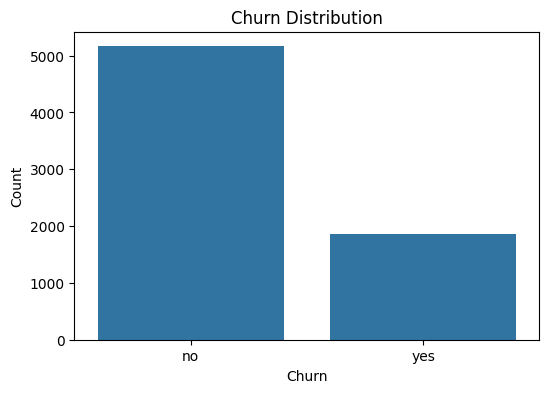

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

churn_counts = df['Churn'].value_counts()
churn_percent = df['Churn'].value_counts(normalize=True) * 100

print("=== Churn Counts ===")
print(churn_counts)

print("\n=== Churn Percentage ===")
print(churn_percent.round(2))

# Plot churn distribution
plt.figure(figsize=(6,4))
sns.barplot(x=churn_counts.index, y=churn_counts.values)
plt.title("Churn Distribution")
plt.ylabel("Count")
plt.xlabel("Churn")
plt.show()


churn Yes ≈ 25–30% → dataset is moderately imbalanced.


VISUALIZATION


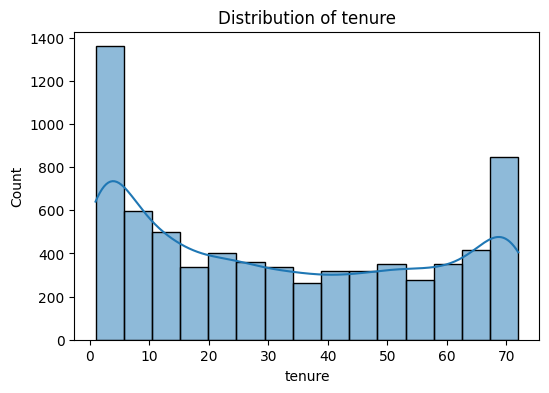

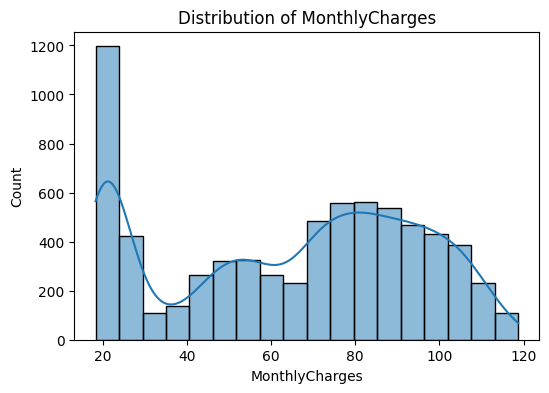

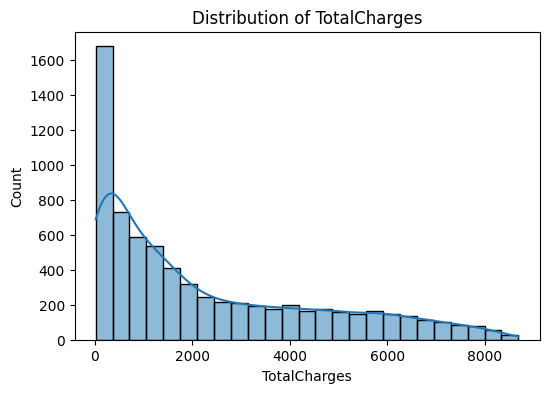

In [22]:
for col in numeric_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()


MonthlyCharges usually right-skewed.

Tenure often bimodal (new vs long-term users).

TotalCharges right-skewed heavily.

Flag outliers manually:
value > df[col].quantile(0.99) → potential extreme users.

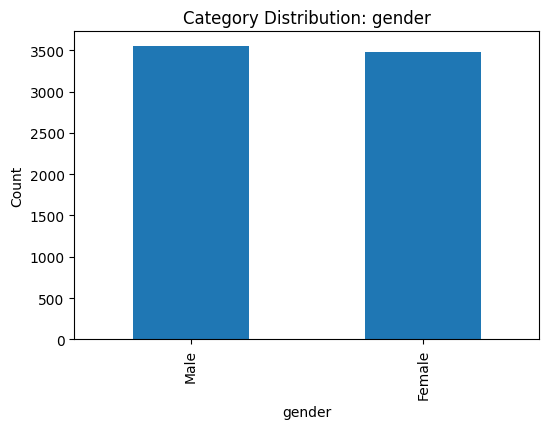

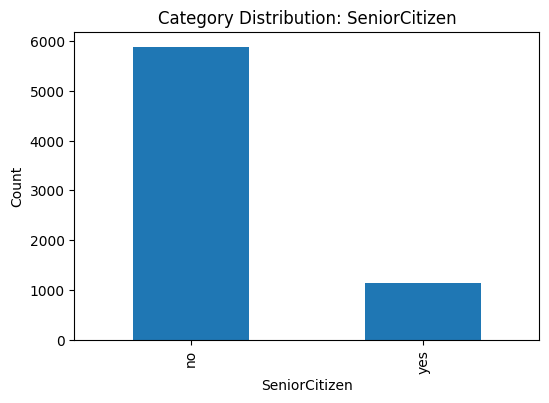

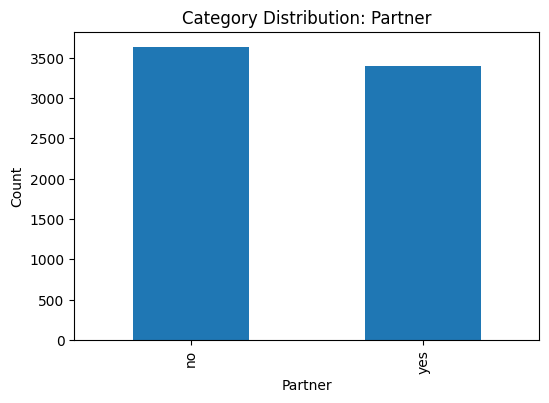

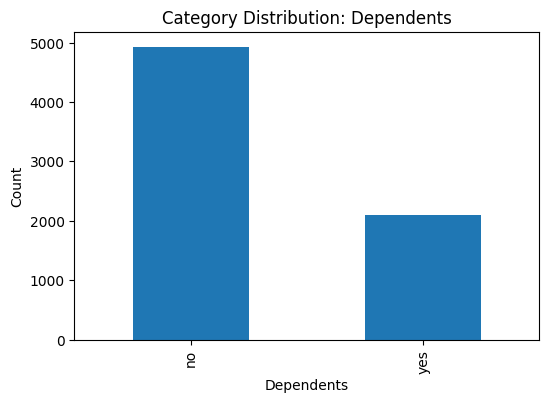

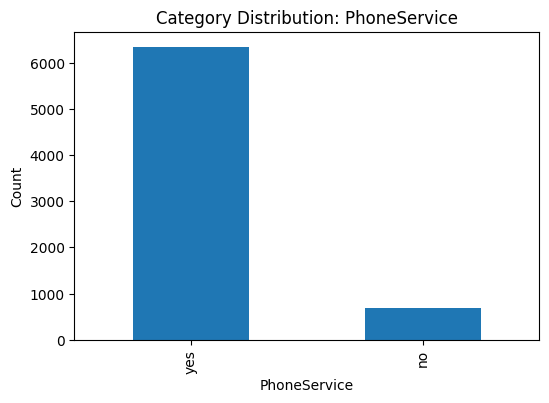

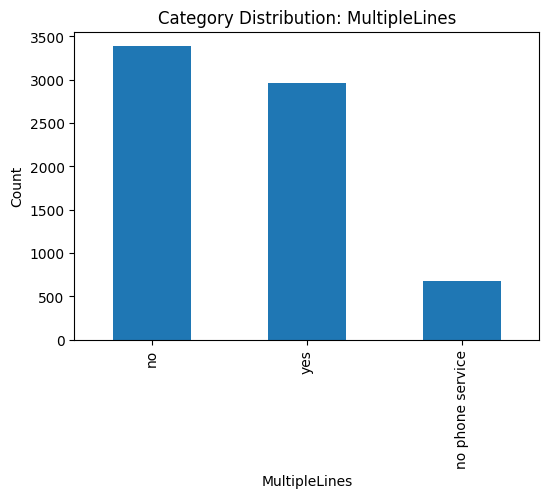

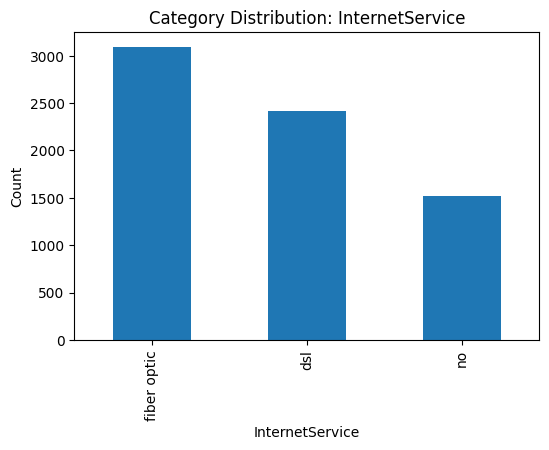

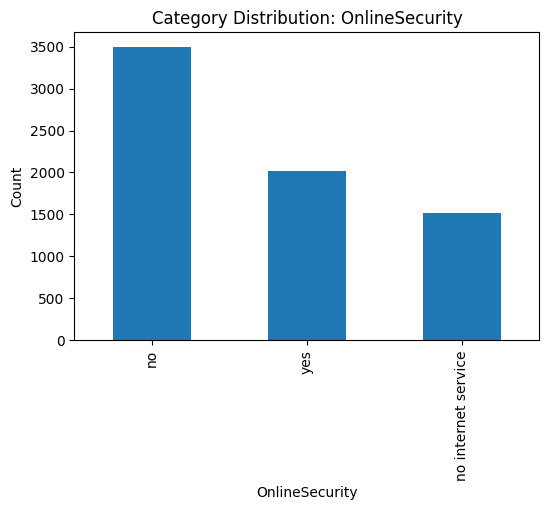

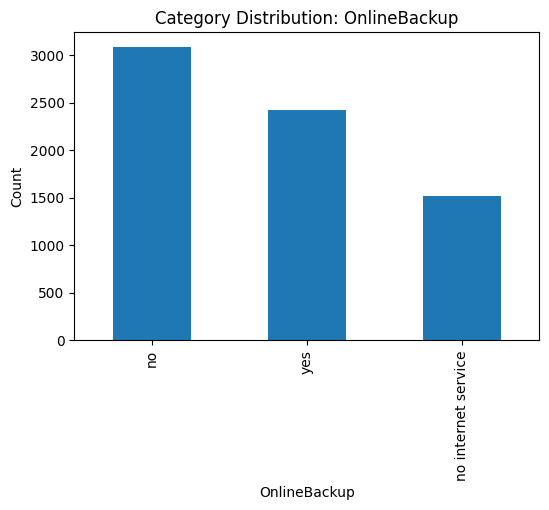

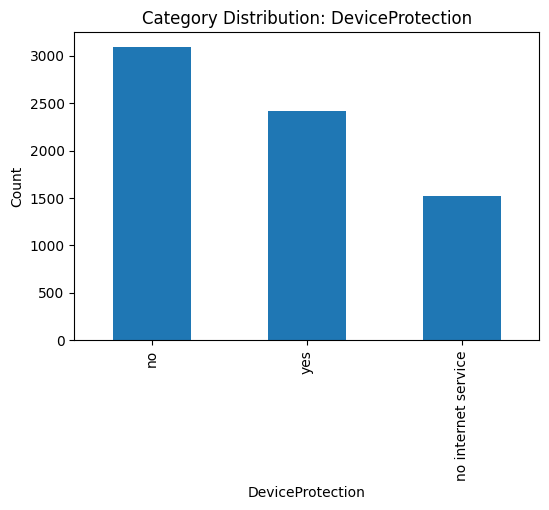

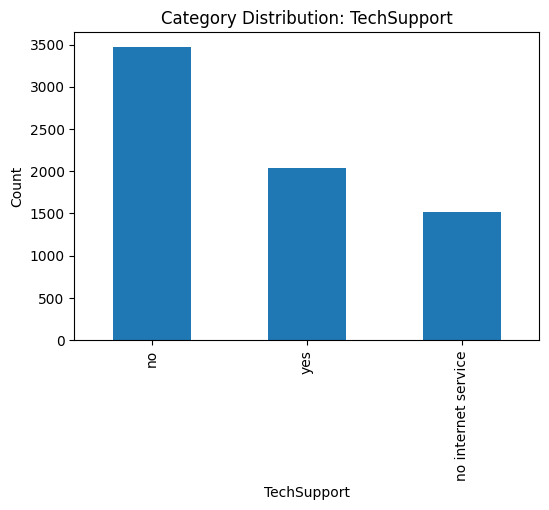

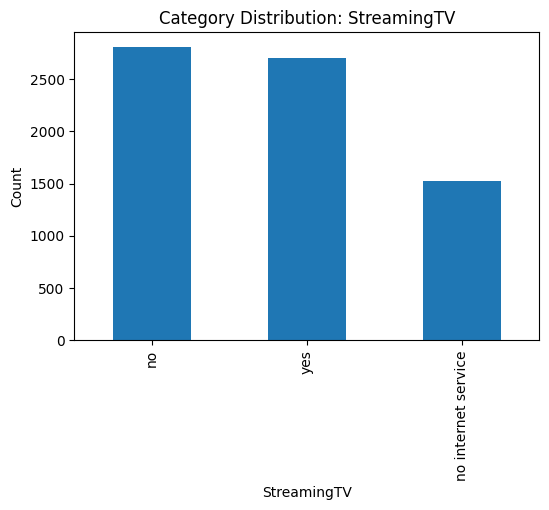

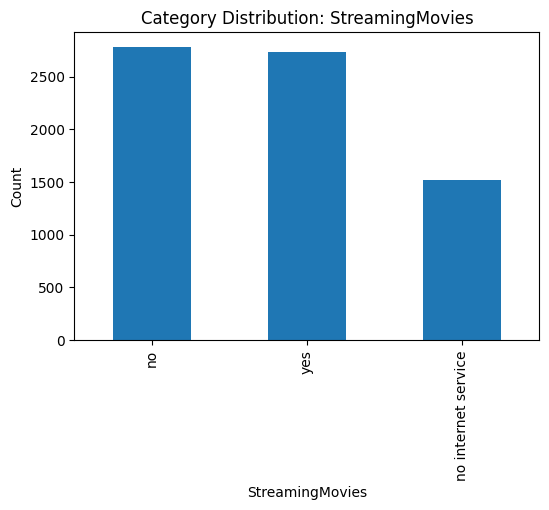

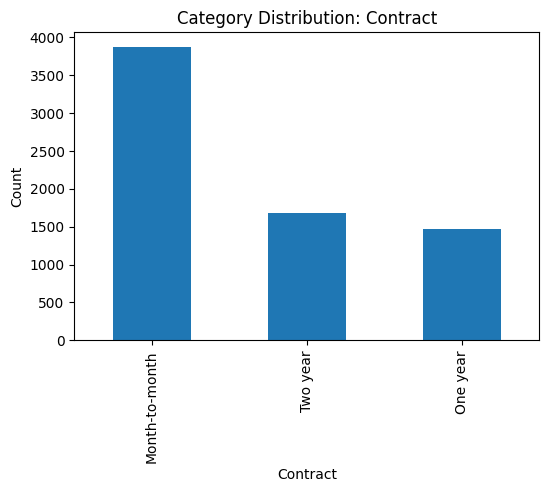

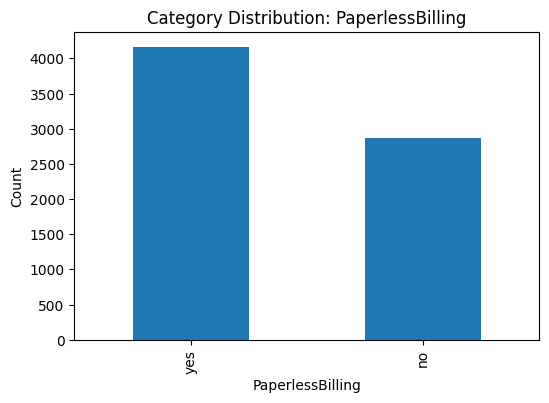

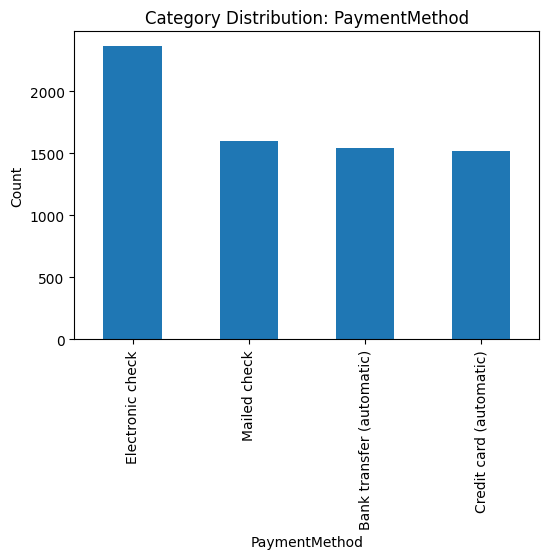

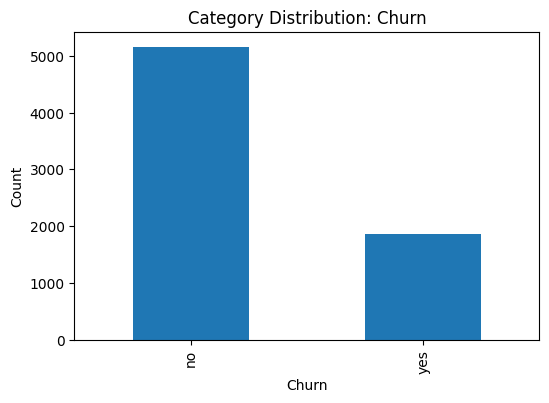

In [23]:
for col in categorical_cols:
    plt.figure(figsize=(6,4))
    df[col].value_counts().plot(kind='bar')
    plt.title(f"Category Distribution: {col}")
    plt.ylabel("Count")
    plt.show()


Contract → Month-to-month dominates.

PaymentMethod → Electronic check often high.

InternetService → Fiber + DSL common.

"Bivariate" means comparing one feature (X) with the target variable (Churn).

In simple words:

👉 We want to understand which customer features influence churn and how strongly.

<Figure size 700x400 with 0 Axes>

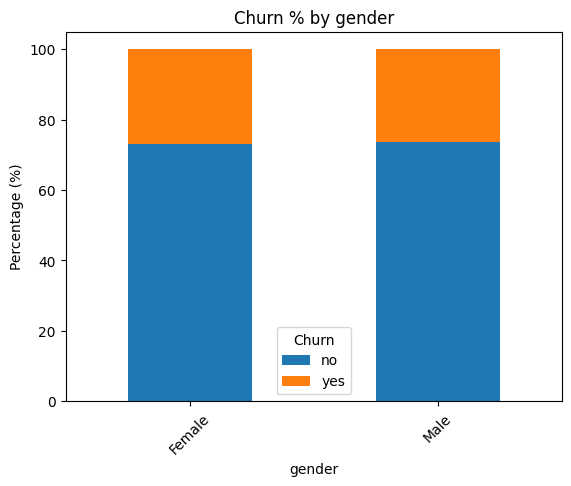


=== Churn % by gender ===
Churn      no    yes
gender              
Female  73.04  26.96
Male    73.80  26.20


<Figure size 700x400 with 0 Axes>

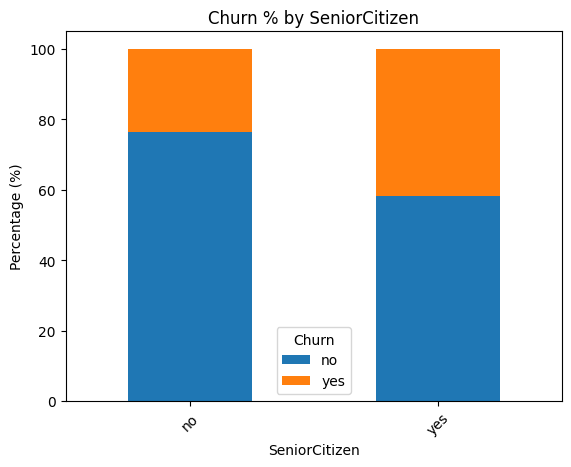


=== Churn % by SeniorCitizen ===
Churn             no    yes
SeniorCitizen              
no             76.35  23.65
yes            58.32  41.68


<Figure size 700x400 with 0 Axes>

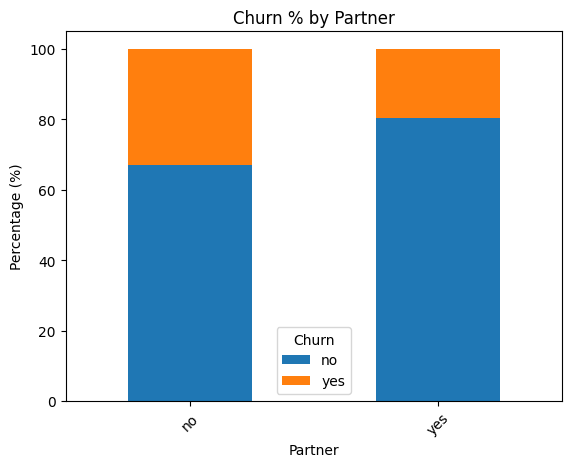


=== Churn % by Partner ===
Churn       no    yes
Partner              
no       67.02  32.98
yes      80.28  19.72


<Figure size 700x400 with 0 Axes>

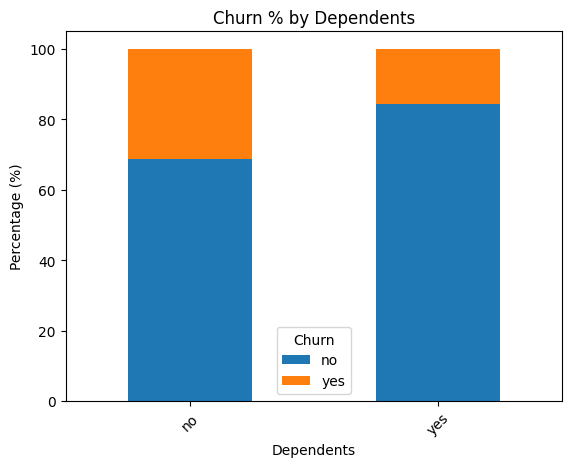


=== Churn % by Dependents ===
Churn          no    yes
Dependents              
no          68.72  31.28
yes         84.47  15.53


<Figure size 700x400 with 0 Axes>

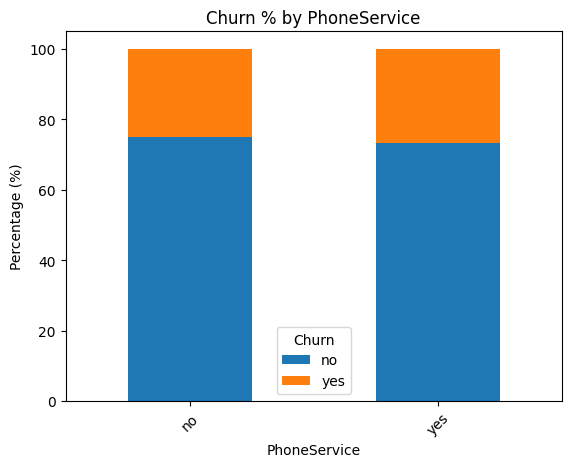


=== Churn % by PhoneService ===
Churn            no    yes
PhoneService              
no            75.00  25.00
yes           73.25  26.75


<Figure size 700x400 with 0 Axes>

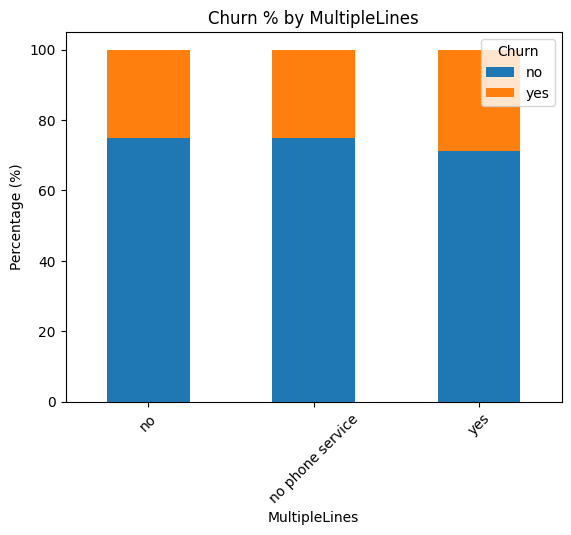


=== Churn % by MultipleLines ===
Churn                no    yes
MultipleLines                 
no                74.92  25.08
no phone service  75.00  25.00
yes               71.35  28.65


<Figure size 700x400 with 0 Axes>

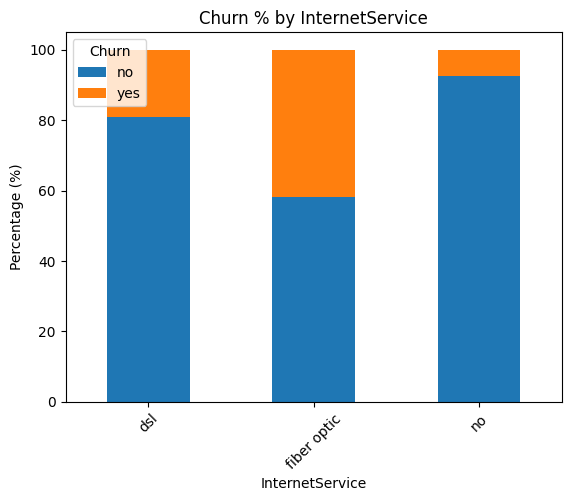


=== Churn % by InternetService ===
Churn               no    yes
InternetService              
dsl              81.00  19.00
fiber optic      58.11  41.89
no               92.57   7.43


<Figure size 700x400 with 0 Axes>

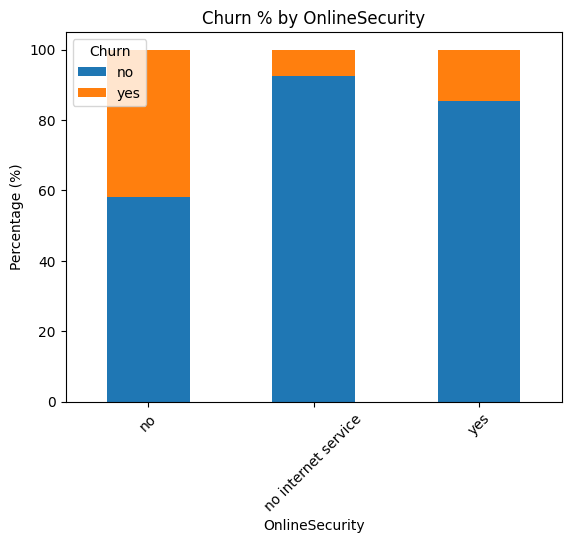


=== Churn % by OnlineSecurity ===
Churn                   no    yes
OnlineSecurity                   
no                   58.22  41.78
no internet service  92.57   7.43
yes                  85.36  14.64


<Figure size 700x400 with 0 Axes>

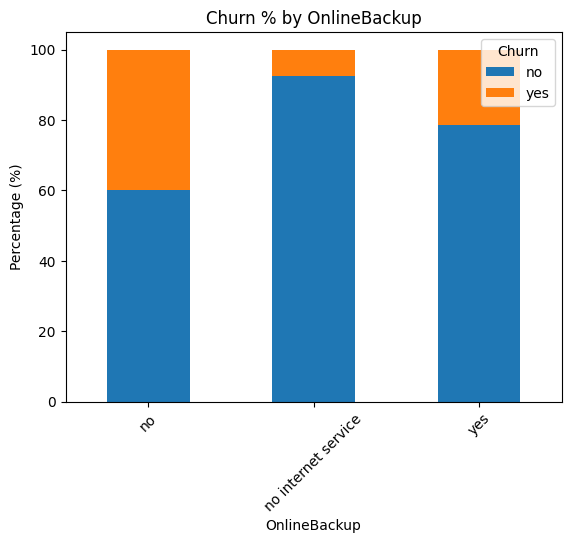


=== Churn % by OnlineBackup ===
Churn                   no    yes
OnlineBackup                     
no                   60.06  39.94
no internet service  92.57   7.43
yes                  78.43  21.57


<Figure size 700x400 with 0 Axes>

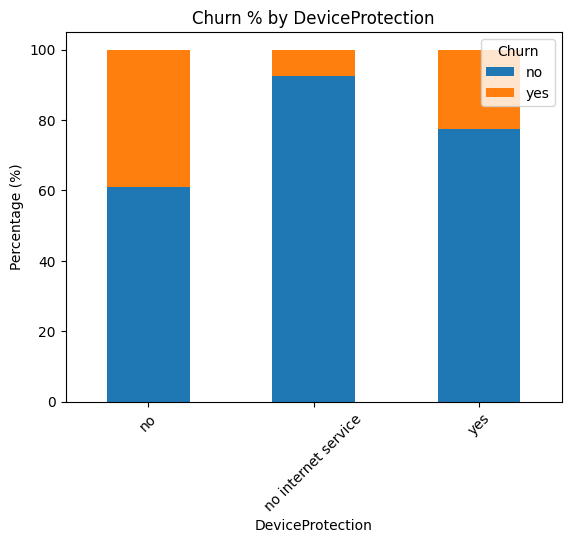


=== Churn % by DeviceProtection ===
Churn                   no    yes
DeviceProtection                 
no                   60.86  39.14
no internet service  92.57   7.43
yes                  77.46  22.54


<Figure size 700x400 with 0 Axes>

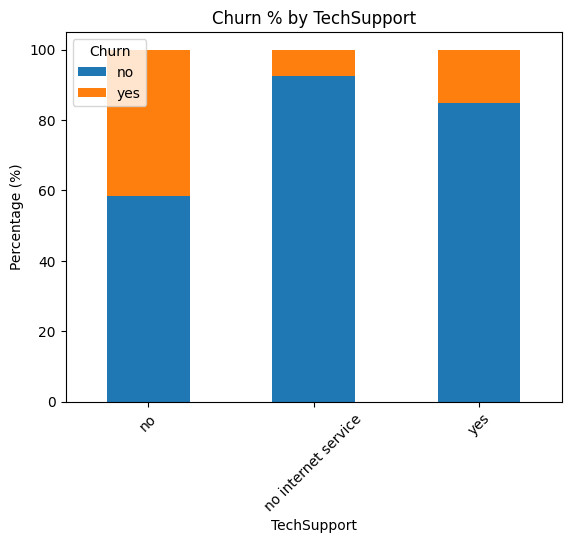


=== Churn % by TechSupport ===
Churn                   no    yes
TechSupport                      
no                   58.35  41.65
no internet service  92.57   7.43
yes                  84.80  15.20


<Figure size 700x400 with 0 Axes>

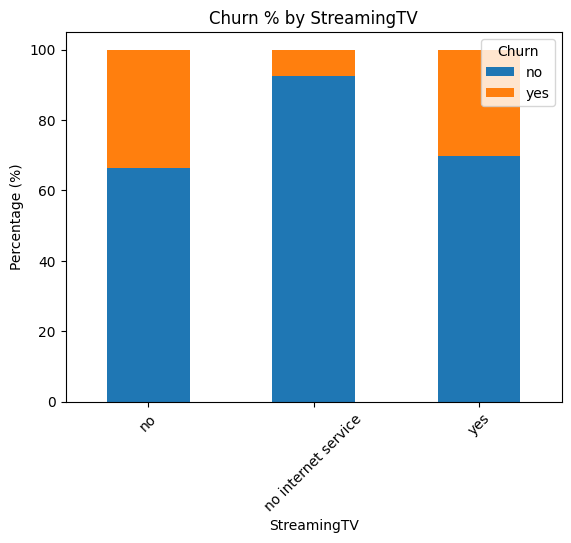


=== Churn % by StreamingTV ===
Churn                   no    yes
StreamingTV                      
no                   66.46  33.54
no internet service  92.57   7.43
yes                  69.89  30.11


<Figure size 700x400 with 0 Axes>

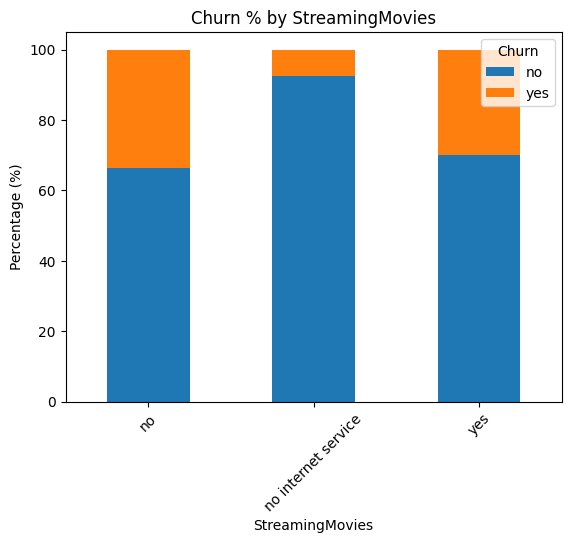


=== Churn % by StreamingMovies ===
Churn                   no    yes
StreamingMovies                  
no                   66.27  33.73
no internet service  92.57   7.43
yes                  70.05  29.95


<Figure size 700x400 with 0 Axes>

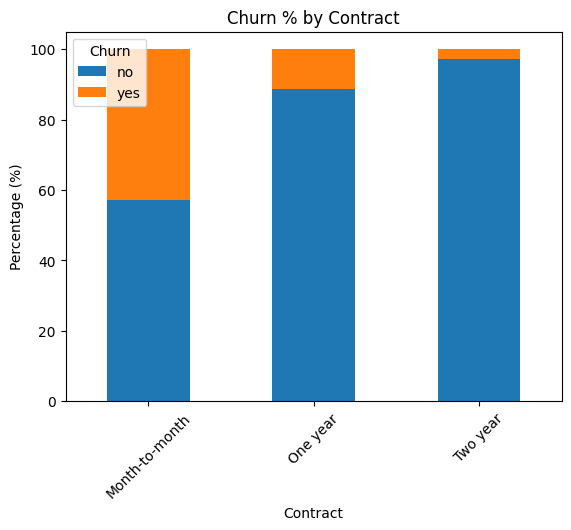


=== Churn % by Contract ===
Churn              no    yes
Contract                    
Month-to-month  57.29  42.71
One year        88.72  11.28
Two year        97.15   2.85


<Figure size 700x400 with 0 Axes>

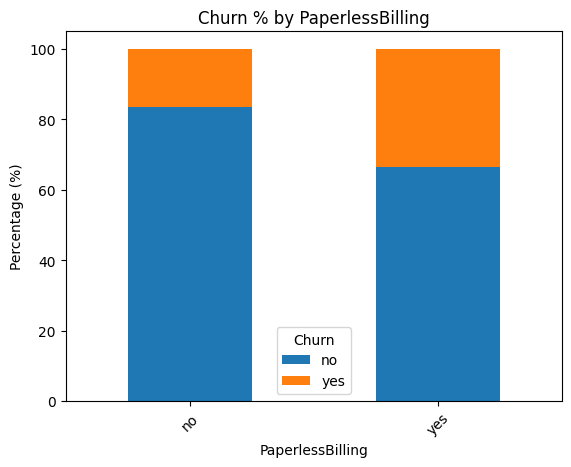


=== Churn % by PaperlessBilling ===
Churn                no    yes
PaperlessBilling              
no                83.62  16.38
yes               66.41  33.59


<Figure size 700x400 with 0 Axes>

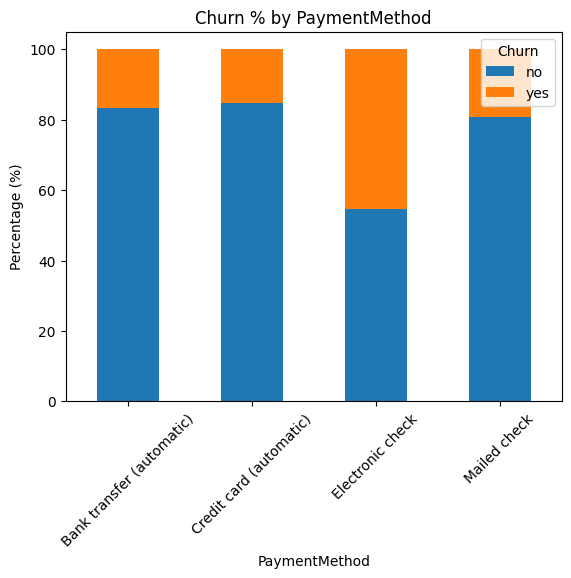


=== Churn % by PaymentMethod ===
Churn                         no    yes
PaymentMethod                          
Bank transfer (automatic)  83.27  16.73
Credit card (automatic)    84.75  15.25
Electronic check           54.71  45.29
Mailed check               80.80  19.20


In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
categorical_cols.remove('Churn')   # exclude target

for col in categorical_cols:
    plt.figure(figsize=(7,4))
    
    churn_rate = (
        df.groupby(col)['Churn']
        .value_counts(normalize=True)
        .unstack()
        .fillna(0) * 100
    )

    churn_rate.plot(kind='bar', stacked=True)
    plt.title(f"Churn % by {col}")
    plt.ylabel("Percentage (%)")
    plt.legend(title="Churn")
    plt.xticks(rotation=45)
    plt.show()
    
    print(f"\n=== Churn % by {col} ===")
    print(churn_rate.round(2))


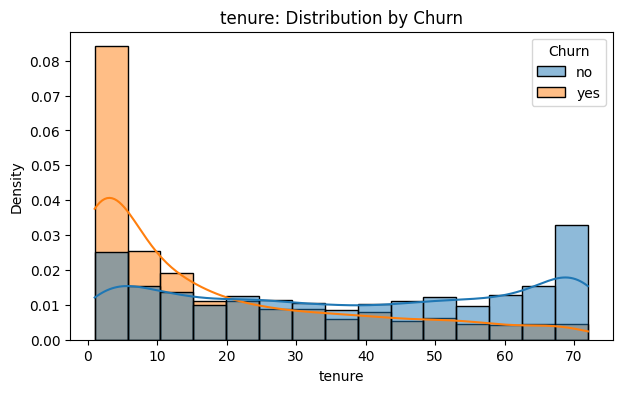

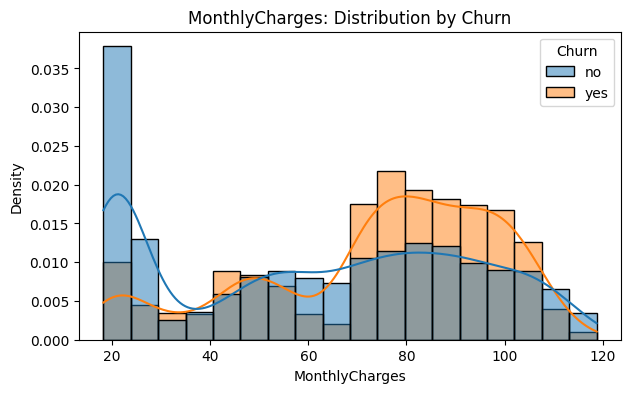

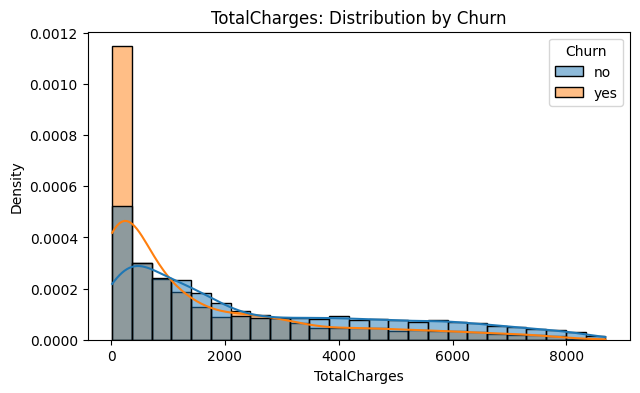

In [26]:
numeric_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

for col in numeric_cols:
    plt.figure(figsize=(7,4))
    sns.histplot(data=df, x=col, hue='Churn', kde=True, stat='density', common_norm=False)
    plt.title(f"{col}: Distribution by Churn")
    plt.xlabel(col)
    plt.ylabel("Density")
    plt.show()


Shows how numeric distributions differ between churners vs non-churners

e.g., churn users may have lower tenure or higher charges

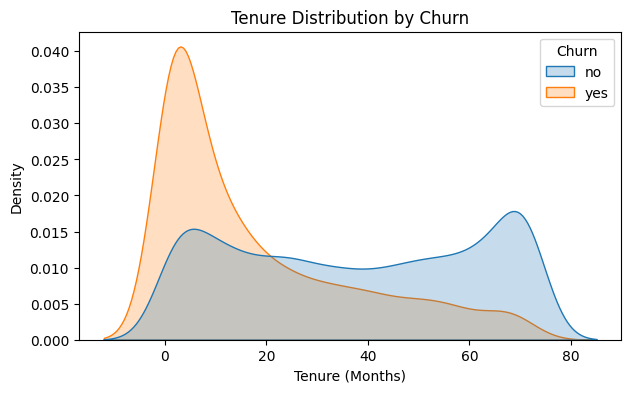

In [27]:
plt.figure(figsize=(7,4))
sns.kdeplot(data=df, x='tenure', hue='Churn', fill=True, common_norm=False)
plt.title("Tenure Distribution by Churn")
plt.xlabel("Tenure (Months)")
plt.show()


✔ Insight:

Churn spikes for low-tenure customers

Long-tenure customers rarely churn

In [28]:
contract_churn = (
    df.groupby('Contract')['Churn']
    .value_counts(normalize=True)
    .unstack()
    .fillna(0) * 100
)

print("=== Churn % by Contract ===")
print(contract_churn.round(2))


=== Churn % by Contract ===
Churn              no    yes
Contract                    
Month-to-month  57.29  42.71
One year        88.72  11.28
Two year        97.15   2.85


Contract type is the strongest predictor of churn.

Short-term (month-to-month) customers are unstable and price-sensitive.

Long-term (1-year, 2-year) contract customers show strong loyalty.

This means contract acts like a built-in retention mechanism.

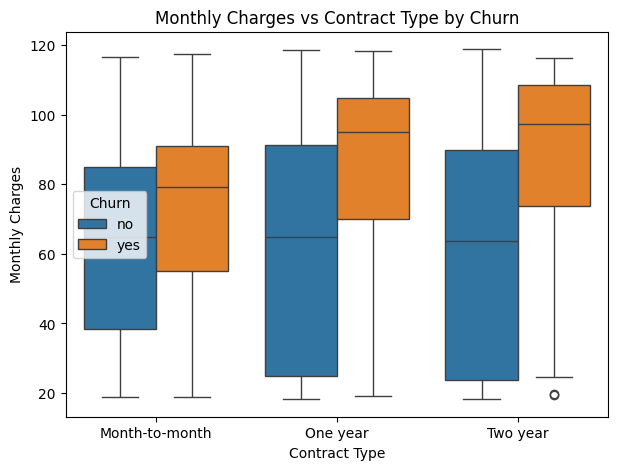

In [29]:
plt.figure(figsize=(7,5))
sns.boxplot(data=df, x='Contract', y='MonthlyCharges', hue='Churn')
plt.title("Monthly Charges vs Contract Type by Churn")
plt.xlabel("Contract Type")
plt.ylabel("Monthly Charges")
plt.legend(title="Churn")
plt.show()


This reveals high-paying month-to-month customers churn most → PRICE-SENSITIVE segment.

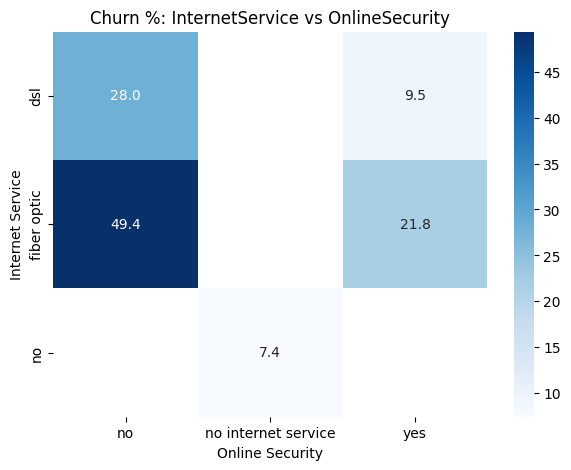

In [31]:
pivot = df.pivot_table(
    values='Churn',
    index='InternetService',
    columns='OnlineSecurity',
    aggfunc=lambda x: (x=='yes').mean()*100
)

plt.figure(figsize=(7,5))
sns.heatmap(pivot, annot=True, cmap='Blues', fmt=".1f")
plt.title("Churn %: InternetService vs OnlineSecurity")
plt.xlabel("Online Security")
plt.ylabel("Internet Service")
plt.show()


The heatmap shows a strong relationship between internet service type, online security, and churn behavior. Fiber optic customers without online security have the highest churn rate (≈49%), indicating dissatisfaction or a higher likelihood of service issues when additional protection is missing. DSL users also show significantly lower churn when online security is present (9.5% vs 28%), confirming that security services improve customer retention. Customers without internet service exhibit very low churn (≈7%), likely because they rely only on phone services, which tend to be more stable. Overall, lack of online security is a major churn driver, especially for fiber-optic users, and bundling security services could reduce churn substantially.

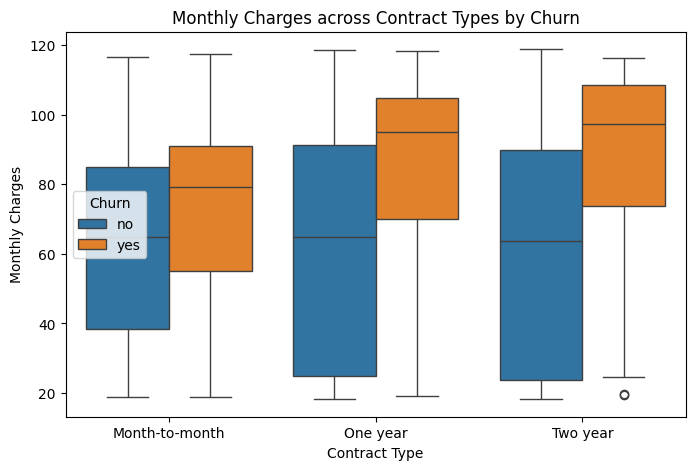

In [32]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x='Contract', y='MonthlyCharges', hue='Churn')
plt.title("Monthly Charges across Contract Types by Churn")
plt.xlabel("Contract Type")
plt.ylabel("Monthly Charges")
plt.legend(title="Churn")
plt.show()


Month-to-month + high monthly charges → highest churn

One-year & two-year → much more stable even at higher charges

FEATURE ENGINEERING

In [35]:
df['Churn_flag'] = df['Churn'].map({
    'Yes': 1, 'No': 0,
    'yes': 1, 'no': 0
})


In [36]:
# Tenure bins: 0–6, 7–12, 13–24, 25–48, 49+
bins = [0, 6, 12, 24, 48, df['tenure'].max()]
labels = ['0-6', '7-12', '13-24', '25-48', '49+']

df['tenure_bin'] = pd.cut(df['tenure'], bins=bins, labels=labels, include_lowest=True)

# Churn % per tenure bin
tenure_bin_churn = df.pivot_table(
    values='Churn_flag',
    index='tenure_bin',
    aggfunc='mean'
) * 100

print("=== Churn % by Tenure Bin ===")
print(tenure_bin_churn.round(2))


=== Churn % by Tenure Bin ===
            Churn_flag
tenure_bin            
0-6              53.33
7-12             35.89
13-24            28.71
25-48            20.39
49+               9.51


In [37]:
df['avg_charge_per_month'] = df['TotalCharges'] / df['tenure'].replace(0, 1)
df['avg_charge_per_month'] = df['avg_charge_per_month'].round(2)

df[['MonthlyCharges', 'TotalCharges', 'avg_charge_per_month']].head()


,MonthlyCharges,TotalCharges,avg_charge_per_month
0,29.85,29.85,29.85
1,56.95,1889.50,55.57
2,53.85,108.15,54.08
3,42.30,1840.75,40.91
4,70.70,151.65,75.82


In [38]:
threshold = df['MonthlyCharges'].quantile(0.90)
df['is_high_monthly'] = (df['MonthlyCharges'] >= threshold).astype(int)

print("High monthly charge threshold:", threshold)
df['is_high_monthly'].value_counts()


High monthly charge threshold: 102.64500000000004


is_high_monthly
0    6328
1     704
Name: count, dtype: int64

High-paying customers churn more

This feature gives models a clean binary signal

In [39]:
df['risky_payment'] = (df['PaymentMethod'].str.lower() == 'electronic check').astype(int)

df['risky_payment'].value_counts()


risky_payment
0    4667
1    2365
Name: count, dtype: int64

Electronic check customers have very high churn

This binary flag is extremely helpful for tree models

In [40]:
payment_counts = df['PaymentMethod'].value_counts()

# Identify categories with very low frequency (<50 users)
rare_payments = payment_counts[payment_counts < 50].index.tolist()

df['PaymentMethod_clean'] = df['PaymentMethod'].replace(
    rare_payments, 'Other'
)


Identify Categorical & Numerical Columns

In [41]:
import pandas as pd

# Drop original churn columns if present in the feature set
X = df.drop(['Churn', 'Churn_flag'], axis=1)
y = df['Churn_flag']

# Identify column types
categorical_cols = X.select_dtypes(include=['object', 'category']).columns.tolist()
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

print("Categorical columns:", categorical_cols)
print("Numerical columns:", numerical_cols)


Categorical columns: ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'tenure_bin', 'PaymentMethod_clean']
Numerical columns: ['tenure', 'MonthlyCharges', 'TotalCharges', 'avg_charge_per_month']


In [42]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), categorical_cols),
        ('num', StandardScaler(), numerical_cols)
    ]
)


Train-Test Split

In [43]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    stratify=y,
    random_state=42
)

print("Train size:", X_train.shape)
print("Test size:", X_test.shape)


Train size: (5625, 24)
Test size: (1407, 24)


Transform Data (Fit on Train Only!)

In [44]:
# Fit on train, transform both
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed  = preprocessor.transform(X_test)

X_train_processed.shape, X_test_processed.shape


((5625, 38), (1407, 38))

Logistic Regression (Baseline Model)

In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

lr = LogisticRegression(max_iter=1000)

lr.fit(X_train_processed, y_train)
y_pred_lr = lr.predict(X_test_processed)
y_prob_lr = lr.predict_proba(X_test_processed)[:, 1]

print("---- Logistic Regression ----")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Precision:", precision_score(y_test, y_pred_lr))
print("Recall:", recall_score(y_test, y_pred_lr))
print("F1 Score:", f1_score(y_test, y_pred_lr))
print("ROC-AUC:", roc_auc_score(y_test, y_prob_lr))


---- Logistic Regression ----
Accuracy: 0.7953091684434968
Precision: 0.6396103896103896
Recall: 0.5267379679144385
F1 Score: 0.5777126099706745
ROC-AUC: 0.837430307861946


Random Forest Classifier

In [46]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=300,
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    random_state=42,
    n_jobs=-1
)

rf.fit(X_train_processed, y_train)
y_pred_rf = rf.predict(X_test_processed)
y_prob_rf = rf.predict_proba(X_test_processed)[:, 1]

print("---- Random Forest ----")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Precision:", precision_score(y_test, y_pred_rf))
print("Recall:", recall_score(y_test, y_pred_rf))
print("F1 Score:", f1_score(y_test, y_pred_rf))
print("ROC-AUC:", roc_auc_score(y_test, y_prob_rf))


---- Random Forest ----
Accuracy: 0.7867803837953091
Precision: 0.6217105263157895
Recall: 0.5053475935828877
F1 Score: 0.5575221238938054
ROC-AUC: 0.8193478834814749


In [47]:
from xgboost import XGBClassifier

xgb = XGBClassifier(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    eval_metric='logloss',
    random_state=42
)

xgb.fit(X_train_processed, y_train)
y_pred_xgb = xgb.predict(X_test_processed)
y_prob_xgb = xgb.predict_proba(X_test_processed)[:, 1]

print("---- XGBoost ----")
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("Precision:", precision_score(y_test, y_pred_xgb))
print("Recall:", recall_score(y_test, y_pred_xgb))
print("F1 Score:", f1_score(y_test, y_pred_xgb))
print("ROC-AUC:", roc_auc_score(y_test, y_prob_xgb))


---- XGBoost ----
Accuracy: 0.7704335465529495
Precision: 0.5752212389380531
Recall: 0.5213903743315508
F1 Score: 0.5469845722300141
ROC-AUC: 0.8165187838754265


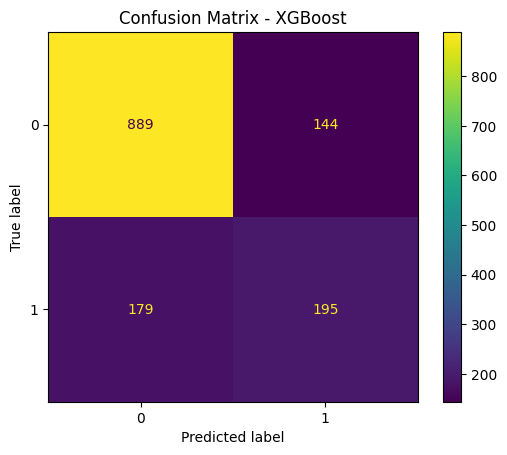

In [48]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

ConfusionMatrixDisplay.from_estimator(xgb, X_test_processed, y_test)
plt.title("Confusion Matrix - XGBoost")
plt.show()


Save the Best Model (XGBoost)

In [49]:
import joblib

# Save model
joblib.dump(xgb, "best_model_xgb.pkl")
print("Model saved as best_model_xgb.pkl")


Model saved as best_model_xgb.pkl


In [50]:
joblib.dump(preprocessor, "preprocessor.pkl")
print("Preprocessor saved as preprocessor.pkl")


Preprocessor saved as preprocessor.pkl


In [51]:
model = joblib.load("best_model_xgb.pkl")
preprocess = joblib.load("preprocessor.pkl")

print("Model and preprocessor loaded successfully!")


Model and preprocessor loaded successfully!


In [52]:
# Example input from a user
sample = X_test.iloc[[0]]  # just taking 1 test example

# Transform
sample_processed = preprocess.transform(sample)

# Predict
prediction = model.predict(sample_processed)
proba = model.predict_proba(sample_processed)[0][1]

print("Prediction:", prediction)
print("Churn probability:", proba)


Prediction: [0]
Churn probability: 0.0013651957
